In [14]:
import sys
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt


In [34]:

base_dir = "E:/Hobbies/programming/"
flight = '230706GO15D'
decimation = '_0.1'
file = base_dir + flight + '_C_decimated' + decimation + '.csv'

In [38]:

base_dir = "F:/Hobbies/programming/"
flight = 'DRE2_Kosovo_joined1'
decimation = '_0.4'
file = base_dir + flight + '_C_decimated' + decimation + '.csv'

In [40]:
grid  = pd.read_csv(file).pivot_table(index='grid_y', columns='grid_x', values='z')
#grid = grid.fillna(0)
image = grid.values

print(image)

#plt.imshow(image)
#plt.savefig('convolution/' + flight + decimation + 'image.png')
#plt.clf()

grid_sz = 2# cm
spot_radius = 6 # cm
spot_grid_radius = spot_radius // grid_sz
filter = -np.ones((spot_grid_radius*4, spot_grid_radius*4))

center = (np.array(filter.shape) / 2) - 0.5
posns = np.transpose(np.nonzero(filter))

in_circle = posns[np.linalg.norm(posns - center, axis=-1) < spot_grid_radius]
in_circle = tuple(in_circle.transpose())

filter[in_circle] = 1
filter -= filter.mean()


#plt.imshow(filter)
#plt.savefig('convolution/' + flight + decimation + 'filter.png')
#plt.clf()



print(image.shape, filter.shape)
convolved = scipy.signal.convolve2d(image, filter)

print(convolved.shape)
print(image.shape)


plt.imshow(convolved, vmin = -20, vmax = 10)
plt.savefig('convolution/' + flight + decimation + 'convolved.png')
plt.clf()

#plt.hist(convolved.flatten(), bins=100)
#plt.ylim(0, 400)
#plt.savefig('convolution/' + flight + decimation + "convolution_result.png")
#plt.clf()


#plt.figure(figsize=(40, 40))
#plt.imshow(convolved < -5)
#plt.savefig('convolution/' + flight + decimation + 'detected.png')
#plt.clf()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(797, 492) (12, 12)
(808, 503)
(797, 492)


<Figure size 640x480 with 0 Axes>

(array([4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 4.0000e+00, 9.0000e+00, 6.0000e+00, 2.1000e+01,
        2.9000e+01, 4.2000e+01, 6.6000e+01, 9.3000e+01, 1.5200e+02,
        2.0100e+02, 2.5800e+02, 4.2800e+02, 6.6600e+02, 1.0980e+03,
        2.1320e+03, 6.1420e+03, 8.1865e+04, 1.0260e+04, 1.5660e+03,
        7.5000e+02, 4.5700e+02, 3.3600e+02, 2.1000e+02, 1.6800e+02,
        1.2800e+02, 9.0000e+01, 5.8000e+01, 5.6000e+01, 3.7000e+01,
        3.4000e+01, 2.8000e+01, 1.7000e+01, 1.6000e+01, 9.0000e+00,
        6.0000e+00, 7.0000e+00, 4.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([-154.71466667, -147.89848444, -141.08230222, -134.26612   ,
        -127.44993778, -120.63375556, -113.81757333, -107.00139111,
        -100.18520889,  -93.36902667,  -86.55284444,  -79.73666222,
         -72.92048   ,  -66.10429778,  -59.28811556,  -52.47193333,
         -45.65575111,  -38.83956889,  -32.023

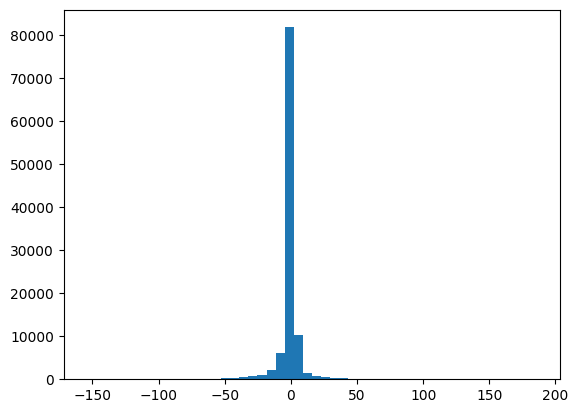

In [41]:
plt.hist(convolved.flatten(), bins = 50)